<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_04_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 4: ChatGPT and Large Language Models**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* Part 4.1: Introduction to Large Language Models (LLMs)
* Part 4.2: Chatbots
* Part 4.3: Image Generation with StableDiffusion
* **Part 4.4: Image Generation with DALL-E**


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.


### **YouTube Introduction to DALL-E**

Run the next cell to see short introduction to DALL-E. This is a suggested, but optional, part of the lesson.

In [1]:
from IPython.display import HTML
video_id = "J683kmIfI5s"
HTML(f"""
<iframe width="560" height="315"
  src="https://www.youtube.com/embed/{video_id}"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
  allowfullscreen>
</iframe>
""")

## **DALL·E Generative Models**

Recent advances in **generative AI**, particularly diffusion models like **OpenAI's DALL·E**, have begun transforming **computational biology**—especially in the field of **protein design**.

DALL·E is a **text-to-image diffusion model** developed by OpenAI that generates images from natural language prompts. Its underlying architecture has inspired similar models in biology that generate **molecular and protein structures** instead of pictures.

#### **Applications in Biology**

Biotech labs are now adapting DALL·E-like models to **design novel proteins** with specific shapes, sizes, and functions. These proteins:
- **Do not exist in nature**
- Can be tailored for **therapeutic purposes**
- May accelerate **drug discovery** and **biomedical innovation**

#### **Key Projects**
- **Chroma** by Generate Biomedicines: Dubbed the *“DALL·E 2 of biology”*, it uses diffusion models to generate symmetrical and functional protein structures.
- **RoseTTAFold Diffusion** by the University of Washington: Developed by David Baker’s lab, this model designs proteins from scratch with high precision.

#### **Impact**
These tools allow scientists to:
- Explore a **vast design space** beyond natural proteins
- Create **custom proteins** for targeted medical applications
- Reduce the time and cost of **drug development**

> “We can discover in minutes what took evolution millions of years.” — Gevorg Grigoryan, CTO of Generate Biomedicines

#### **References**
- [MIT Technology Review](https://www.technologyreview.com/2022/12/01/1064023/biotech-labs-are-using-ai-inspired-by-dall-e-to-invent-new-drugs/)[1](https://www.technologyreview.com/2022/12/01/1064023/biotech-labs-are-using-ai-inspired-by-dall-e-to-invent-new-drugs/)
- [Interesting Engineering](https://interestingengineering.com/science/ai-inspires-labs-new-medicine)[2](https://interestingengineering.com/science/ai-inspires-labs-new-medicine)


### Test Your OPENAI_API_KEY

In order to run the code in this lesson you will need to have your secret `OEPNAI_API_KEY` installed in your **Secrets** on this Colab notebook. Detailed steps for purchasing your `OPENAI_API_KEY` and installing it in your Colab notebook Secrets was provide in `Class_04_1`.

Run the code in the next cell to see if your `OPENAI_API_KEY` is installed correctly. You make have to Grant Access for your notebook to use your API key.

In [ ]:
# Verify your API key setup

from google.colab import userdata
import os

# Check if API key is properly loaded
try:
    OPENAI_KEY = userdata.get('OPENAI_API_KEY')
    print("API key loaded successfully!")
    print(f"Key length: {len(OPENAI_KEY)}")
except Exception as e:
    print(f"Error loading API key: {e}")
    print("Please set your API key in Google Colab:")
    print("1. Go to Secrets in the left sidebar")
    print("2. Create a new secret named 'openai_api_key'")
    print("3. Paste your OpenAI API key")


1. You may see this message when you run this cell:


![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image08C.png)

If you do see this popup just click on `Grant access`.


2. If your `OPENAI_API_KEY` is correctly installed you should see the following output.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image09C.png)

3. However, if you see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image10C.png)

You will need to correct the error before you can continue. Ask your Instructor or TA for help if you can resolve the error yourself.

### Install `LangChain` packages

Run the code in the following cell to install the `langchain-openai` and related packages.

In [ ]:
# Install langchain-openai packages

!pip install -q langchain openai langchain_openai > /dev/null

If the code is correct you should not see any output.

### **Optional YorTube Video**

If you are interested in knowing more about OpenAI `DALL-E` run the next cell to watch this YouTube video.

In [ ]:
from IPython.display import HTML

# Extracted video ID from the new URL
video_id = "qTgPSKKjfVg"

# Construct the proper embed URL
embed_url = f"https://www.youtube.com/embed/{video_id}"

# Display the embedded video
HTML(f"""
<iframe width="560" height="315" src="{embed_url}"
frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
allowfullscreen></iframe>
""")


# **Generating Images with DALL·E**

**DALL·E** is an advanced generative AI model developed by `OpenAI` that creates images from textual descriptions. It is designed to interpret and visually represent detailed prompts, producing diverse and creative imagery ranging from realistic to abstract. `DALL·E` is capable of synthesizing a wide variety of artistic styles, objects, and environments based on the user's input.

API access to DALL·E is available through `OpenAI`, allowing developers to integrate image generation capabilities into their applications. This API allows users to provide text prompts, specifying what kind of image they want, and `DALL·E` responds by generating corresponding visuals. The API is designed for scalability and ease of integration, making it a powerful tool for developers seeking to add creative image generation features to web applications, mobile apps, or other digital platforms.

By leveraging `DALL·E` through the `OpenAI API`, users gain access to a state-of-the-art tool capable of turning imagination into highly detailed visuals, applicable in industries ranging from design and marketing to entertainment and education.

### **DALL·E 2 vs DALL·E 3**

**DALL·E 2** and **DALL·E 3** are successive versions of OpenAI's powerful image generation models, each building upon the strengths and capabilities of its predecessor.

`DALL·E 2`, released in 2022, represented a significant leap from the original `DALL·E` model. It was capable of creating high-resolution, highly detailed images from textual prompts, with a particular focus on creative abstraction and imaginative combinations. Some key features of `DALL·E 2` include:

* **Realism and Artistic Expression**: `DALL·E 2` excelled at generating both photorealistic images and artistic interpretations based on the text input. It had a remarkable ability to blend various elements (e.g., surreal, abstract, or realistic objects) into coherent compositions.
* **Inpainting**: Users could modify specific parts of an image by describing the desired change, allowing for more interactive control over image generation.
* **Style Variations**: DALL·E 2 could mimic different art styles, such as painting or photography, providing flexibility for creative projects.

While `DALL·E 2` was highly versatile and generated impressive imagery, its prompt comprehension and adherence to nuanced text could sometimes fall short. It struggled with complex or ambiguous instructions, occasionally misinterpreting subtle details in the user input.

**`DALL·E 3`**, released in 2023, improved upon the limitations of `DALL·E 2` and introduced new capabilities that made it more accessible and precise:

* **Enhanced Text Comprehension**: One of the standout features of DALL·E 3 is its improved ability to understand and accurately follow more complex or specific instructions. It does a much better job of capturing nuances, making it easier to generate images that align with the user’s expectations, even with detailed or intricate prompts.
* **Deeper Integration with ChatGPT**: DALL·E 3 was deeply integrated with ChatGPT, enabling users to interact with the model conversationally, refining their prompts and requests iteratively. This integration simplifies the creative process, allowing for more intuitive prompt adjustments.
* **Reduction of Known Limitations**: DALL·E 3 improved its handling of difficult tasks such as rendering human hands and faces, areas where previous models often produced distorted or unrealistic results.
Inpainting Enhancements: DALL·E 3 continues the development of inpainting, providing even greater control over modifications to specific areas of generated images, allowing users to refine portions of images without starting over from scratch.

The Images API provides three methods for interacting with images:

* Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
* Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
* Creating variations of an existing image (DALL·E 2 only)

### Example 1: Generate Single Image with DALL·E 2

The code in the cell below generates 3 differnt images of a "a white siamese cat".

In [ ]:
# Example 1: Generate single image

from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from google.colab import userdata

# Set prompt
PROMPT="a white siamese cat"

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')

# Ensure that the API key is correctly set
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set. Please check if you have stored the API key in userdata.")

# Initialize the OpenAI client with the API key
client = OpenAI(api_key=OPENAI_KEY)

# Generate one image
response = client.images.generate(
    model="dall-e-2",
    prompt=PROMPT,
    size="1024x1024",
    n=1,
)

# Get the image URL
image_url = response.data[0].url

# Fetch the image from the URL
response2 = requests.get(image_url)
img = Image.open(BytesIO(response2.content))

# Save the image as a JPG to disk
img.save("cat_image.jpg", "JPEG")

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()


If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image06A.png)


### **Exercise 1: Generate Single Image with DALL·E 2**

In the cell below write the code to generate a single image of a "a roadrunner eating a lizard".

In [ ]:
# Insert your code for Exercise 1 here




If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image07A.png)


## **Generating Multiple Images**

DALL·E 2 allows you to generate multiple images, which we will see in this section.

You are allowed to select the resolution, by the `OpenAI` library; however, not all of these resolutions will be available for every model:

* 1024x512
* 256x256
* 512x512
* 1024x1024
* 1024x1792
* 1792x1024

`DALL·E 3` allows an additional quality of "hd"; whereas `DALL·E 2` only supports "df".

* standard
* hd


### Example 2: Generate Multiple Images with DALL·E 2

The code in the cell below generates 3 differnt images of a "a white siamese cat".

In [ ]:
# Example 2: Generate multiple images

from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from google.colab import userdata

# Set prompt
PROMPT="a white siamese cat"

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')

# Ensure that the API key is correctly set
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set. Please check if you have stored the API key in userdata.")

# Initialize the OpenAI client with the API key
client = OpenAI(api_key=OPENAI_KEY)

# Generate 3 images
response = client.images.generate(
    model="dall-e-2",
    prompt=PROMPT,
    size="1024x1024",
    n=3,
)

# Loop through the generated images, display them with matplotlib, and save as JPG
for i, data in enumerate(response.data):
    image_url = data.url
    img_response = requests.get(image_url)
    img = Image.open(BytesIO(img_response.content))
    img.save(f"cat_image_{i+1}.jpg", "JPEG")
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
    plt.show()


If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image01A.png)


### **Exercise 2: Generate Multiple Images with DALL·E 2**

In the cell below write the code to generate 3 images of a "a roadrunner eating a lizard".

In [ ]:
# Insert your code for Exercise 2 here


If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image05A.png)


## **DALL·E Existing Images**

**`DALL·E`** has the ability to extend images by generating additional content based on the original image and a provided prompt. This feature, often called "outpainting," allows users to expand the boundaries of an image, adding context or completing a scene beyond the original frame. The original image serves as the foundation, while the mask image is used to define the areas where new content will be generated. The mask, typically a transparent or blocked-out region, signals to DALLE which parts of the canvas need to be filled in. By specifying a new prompt, the user guides DALLE on how to interpret the masked area, dictating the nature of the extension in alignment with the style, context, or subject matter of the original image.

In practice, outpainting leverages the original image and prompt to maintain coherence between the existing and generated content. For instance, if the original image is a landscape, the prompt can guide DALLE to extend that landscape with consistent colors, textures, and thematic elements. The system seamlessly blends the generated pixels into the original, creating an expanded scene that appears natural. The prompt plays a crucial role in steering the generation process, describing the desired extension in terms of objects, settings, or creative directions, while the mask ensures that the new content integrates smoothly into the intended area without overwriting the existing details.

### Example 3: Modify Existing Image

The code in the cell below uses this original image of a sea turtle

Original image:

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image13A.png)

and adds an element to the image based on a text prompt.The image location for the placement will occur depends upon a "mask" image.

A **mask image** is a type of image used in computer graphics and image processing to selectively control which parts of another image are visible, edited, or affected by operations. It acts like a stencil or filter. In this picture of the mask image the white area shows the image location that will be "edited" by `OpenAI`.
    
Mask image:  
    
![__](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image31A.png)

In this example an extemely simple text prompt was used--just the word "cat".

In [ ]:
# Example 3: Modify Existing Image

import requests
from PIL import Image, ImageEnhance
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI
from google.colab import files

# Define prompt
PROMPT = "cat"
print(f"PROMPT = {PROMPT}")

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set.")

# Initialize OpenAI client
client = OpenAI(api_key=OPENAI_KEY)

# Function to fetch image from URL
def fetch_image(url, save_path=None):
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to download image from {url}: {response.status_code}")
        return None
    img = Image.open(BytesIO(response.content))
    if save_path:
        img.save(save_path, format="PNG")
    return img

# URLs for image and mask
image_url = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image_01.png"
mask_url =  "https://biologicslab.co/BIO1173/images/class_04/class_04_4_mask_01.png"

# Save images without converting to RGBA
image_path = "image.png"
mask_path = "mask.png"
fetch_image(image_url, image_path)
fetch_image(mask_url, mask_path)

# Call OpenAI API
with open(image_path, "rb") as image_file, open(mask_path, "rb") as mask_file:
    response = client.images.edit(
        image=image_file,
        mask=mask_file,
        prompt=PROMPT,
        n=2,
        size="1024x1024"
    )

# Display result
edited_image_url = response.data[0].url
edited_image = fetch_image(edited_image_url)

try:
    plt.imshow(edited_image)
    plt.axis('off')
    plt.title("Edited Image")
    plt.show()
except Exception as e:
    print(f"Error displaying the edited image: {e}")


If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image32A.png)

The `Edited Image` (`output`) can be quite variable. If rerun the above cell you we see quite different outputs. I had to run the cell above several times to generate this particular image.

You should notice that the cat addeb by DALL-E nicely blends into the background and is completely surrounded by water. In other words, DALL-E is doing much more than a simple "copy-and-paste".

### **Exercise 3: Modify Existing Image**

The output (`Edited Image`) in Example 3 was quite variable. We also used a very simple prompt `cat`.

In **Exericse 3** you will examine the effect(s) of using a more detailed prompt.

In the cell below use the code and the same images of the sea turtle and the same mask that were used in Example 5 but only change the prompt.

Use instead this more detailed prompt:

```type
# Define prompt
PROMPT = (
    "A domestic short-haired cat lying comfortably on a vibrant coral reef "
    "in an underwater scene, alongside a sea turtle swimming above. "
    "The cat appears relaxed and is gazing toward the viewer, blending "
    "naturally into the marine environment despite the surreal setting."
)

```

In [ ]:
# Insert your code for Exercise 3 here



If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image38A.png)

Even with the more detailed prompt, the `Edited Image` (`output`) can still be variable albeit much less variable that the output with the extremely simple prompt "cat". Rerun the above cell a few times to see the range of different outputs.


### Example 4: Modify Existing Image

The code in the cell below uses the same image of a sea turtle

Original image:

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image13A.png)

but changes the location of **editible region** in the mask image (i.e. the white area).
    
Mask image:  
    
![__](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image34A.png)

Since the **editible area** (i.e. white oval) in the mask covers the sea turtle, we would expect the turtle will be replaced by the object defined in the text `prompt`.

In Example 4 we will be using the following prompt that is moderately detailed:

```text
PROMPT = (
    " A cute young baby girl swimming towards the camera."
    " She is extemely close so her face is very large in the scene"
    " She is holding her breath and is not wearing any goggles or face mask"
)  
```

Run the code in the next cell to see what happens when we give DALL-E the new prompt.

In [ ]:
# Example 4: Modify Existing Image

import requests
from PIL import Image, ImageEnhance
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI
from google.colab import files

# Define prompt
# Define prompt
PROMPT = (
    " A cute young baby girl swimming towards the camera."
    " She is extemely close so her face is very large in the scene"
    " She is holding her breath and is not wearing any goggles or face mask"
)
print(f"PROMPT = {PROMPT}")

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set.")

# Initialize OpenAI client
client = OpenAI(api_key=OPENAI_KEY)

# Function to fetch image from URL
def fetch_image(url, save_path=None):
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to download image from {url}: {response.status_code}")
        return None
    img = Image.open(BytesIO(response.content))
    if save_path:
        img.save(save_path, format="PNG")
    return img

# URLs for image and mask
image_url = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image_01.png"
mask_url =  "https://biologicslab.co/BIO1173/images/class_04/class_04_4_mask_02.png"

# Save images without converting to RGBA
image_path = "image.png"
mask_path = "mask.png"
fetch_image(image_url, image_path)
fetch_image(mask_url, mask_path)

# Call OpenAI API
with open(image_path, "rb") as image_file, open(mask_path, "rb") as mask_file:
    response = client.images.edit(
        image=image_file,
        mask=mask_file,
        prompt=PROMPT,
        n=2,
        size="1024x1024"
    )

# Display result
edited_image_url = response.data[0].url
edited_image = fetch_image(edited_image_url)

try:
    plt.imshow(edited_image)
    plt.axis('off')
    plt.title("Edited Image")
    plt.show()
except Exception as e:
    print(f"Error displaying the edited image: {e}")


If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image37A.png)

As before, the `Edited Image` (`output`) can be quite variable. If you rerun the above cell several times you will get quite different outputs.

### **Exercise 4: Modify Existing Image**

For **Exercise 4** reuse the code from Example 4. However, change the `prompt` to insert an **inanimate object** into the scene. You are free to choose any inanimate object that you would like. Here is a chance to show your creativity!

In [ ]:
# Insert your code for Exercise 4 here


This is output obtained using the following `prompt`:

```text
# Define prompt
PROMPT = (
    " A British classic MGA sports car."
    " The car's color is British Racing Green"
)
```

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image39A.png)

Your output will depend upon the `prompt` you created.


## **Creating Variations**

**DALL-E** offers the ability to create variations of images, a feature that allows users to generate alternate versions of an existing image with slight modifications while maintaining the overall theme or structure. This functionality is available via the API in DALLE 2, where developers can provide an image input and request multiple variations based on it. The API enables integration into applications that require creative content generation or visual brainstorming. However, this image variation feature is not yet supported in DALLE 3, meaning users must still rely on DALLE 2 for this specific capability.

### Create Functions

The code below creates 3 functions we will need to demonstrate `DALL-E's` create variation capability:

1. `display_image(image, title)`
2. `load_image_from_url(url)`
3. `generate_variations( )`

In [ ]:
# Create functions

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_image(image, title=None):
    """Display an image using matplotlib."""
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

def load_image_from_url(url):
    """Download an image from a URL and return a file-like object."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert("RGBA")
        img_byte_array = BytesIO()
        img.save(img_byte_array, format='PNG')
        img_byte_array.seek(0)
        return img_byte_array
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def generate_variations(client, image_file, n=2, size="1024x1024", save_images=True):
    """Generate and display image variations using DALL·E 2."""
    try:
        response = client.images.create_variation(
            image=image_file,
            n=n,
            size=size
        )
        for i, data in enumerate(response.data):
            variation_url = data.url
            variation_response = requests.get(variation_url)
            variation_image = Image.open(BytesIO(variation_response.content))
            display_image(variation_image, title=f"Variation {i+1}")
            if save_images:
                variation_image.save(f"variation_image_{i+1}.png", "PNG")
    except Exception as e:
        print(f"Error generating variations: {e}")


### Example 5: Create Variations

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image42A_little.png)

In Example 5 we are going to demonstrate `DALL-E 2's` ability to generate "variations" of an image using this picture of `Grogu`, _aka_ "Baby Yoda".

In [ ]:
# Example 5: Create variations

from openai import OpenAI
from image_utils import load_image_from_url, generate_variations

# Set number of variations
var_num = 2

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set.")

# Initialize OpenAI client
client = OpenAI(api_key=OPENAI_KEY)

# Main execution
image_url = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image42A.png"
image_file = load_image_from_url(image_url)

if image_file:
    generate_variations(client, image_file, n=var_num, size="1024x1024", save_images=True)


If the code is correct you should see something like the following


![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image43A.png)

### **Exercise 5: Create Variations**

In the cell below write the code to create variations on a cartoon image of Grogu ("Baby Yoda") surrounded by Ewoks. You can reuse the code in Example 5 but you will need to change the URL for the image.

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image44A_little.png)

Here is the URL you need to use to use the correct initial image:

```text
# Main execution
image_url = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image44A.png"
```


In [ ]:
# Insert your code for Exercise 5 here



If the code is correct you should see something like the following


![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image45A.png)

## **Image to Art**


Using this multimodal approach, we can also generate prompts that describe an image in a way that allows us to render it as a cartoon. By inputting an image alongside a text description, the model can analyze its visual components and then generate a creative, detailed prompt specifically crafted to produce a cartoon-like rendering. Once we have this prompt, we can pass it to DALLE, OpenAI's image generation model, to transform the visual data into a stylized cartoon version. This workflow allows for automated, creative transformations of images, combining the interpretive power of a multimodal model with the generative capabilities of DALLE, enabling users to create custom visual outputs from real-world images.

### Example 6A: Generate Prompt from Image

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image42A_little.png)

The code in the cell below uses `OpenAI` to analyze this image of `Grogu` and return a text description of the image's content. We will use this text description in Example 6B to regenerate the iamge.

In [ ]:
# Example 6A: Generate Prompt from Image

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
import base64
import httpx
import textwrap

MODEL = "gpt-4o-mini"
image_url = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image42A.png"
prompt = "Describe this image."

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set.")

# Initialize the GPT model
model = ChatOpenAI(model="gpt-4o-mini", openai_api_key=OPENAI_KEY)

# Fetch image data and encode it in base64
image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

# Create a message with both text and the image
message = HumanMessage(
    content=[
        {"type": "text", "text": prompt},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}},
    ],
)

# Get response with a modified prompt from GPT
response = model.invoke([message])

# Wrap the text output to avoid scrolling off the screen in Colab
wrapped_output = textwrap.fill(response.content, width=80)
print(wrapped_output)


If the code is correct you should see something like the following


![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image46A.png)

### Example 6B: Generate Image from Text

Now that we have a textual description of our image, we can use it as a prompt to generate 3 new images using the same code demonstrated in Example 2 above.

The only _tricky_ part of the process is making sure to format the prompt correctly. If you try to simply `copy-and-paste` the output text as is you will most likely generate an error. This is because Python will interprets the carriage-returns at the end of each line as a new command, not part of the text.

The solution is to rewrite the text output shown in the output above as follows:

```text
# Set prompt
PROMPT = (
"The image shows a small, humanoid figure with green skin and large, expressive"
"eyes. It has prominent, oversized ears and is wearing a cozy, beige cloak with a"
"hood. The figure appears to be seated on a mossy surface, surrounded by natural"
"greenery. The overall look gives off a sense of innocence and curiosity."
)
```

This prompt was created simply by `copying-and-pasting` the text between two parantheses and adding double quotation marks (`#`) at the start and the end of each line of text. The parentheses `( )` that enclose the prompt tells Python to consider all of the separate lines as a single string.

In [ ]:
# Example 6B: Generate image from text

from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from google.colab import userdata

# Set prompt
PROMPT = (
"The image shows a small, humanoid figure with green skin and large, expressive"
"eyes. It has prominent, oversized ears and is wearing a cozy, beige cloak with a"
"hood. The figure appears to be seated on a mossy surface, surrounded by natural"
"greenery. The overall look gives off a sense of innocence and curiosity."
)

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')

# Ensure that the API key is correctly set
if not OPENAI_KEY:
    raise ValueError("OpenAI API key is not set. Please check if you have stored the API key in userdata.")

# Initialize the OpenAI client with the API key
client = OpenAI(api_key=OPENAI_KEY)

# Generate 3 images
response = client.images.generate(
    model="dall-e-2",
    prompt=PROMPT,
    size="1024x1024",
    n=3,
)

# Loop through the generated images, display them with matplotlib, and save as JPG
for i, data in enumerate(response.data):
    image_url = data.url
    img_response = requests.get(image_url)
    img = Image.open(BytesIO(img_response.content))
    img.save(f"cat_image_{i+1}.jpg", "JPEG")
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
    plt.show()


If the code is correct you should see something like the following


![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image50A.png)

### **Exercise 6A: Generate Prompt from Image**

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image44A_little.png)

This is a carton image of `Grogu` in a forest surrounded by baby Ewoks. Here is the URL for this image:

```text
image_url = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image44A.png"
```
In the cell below write the code to generate a text prompt from an analysis of this image.

In [ ]:
# Insert your code for Exercise 6A here



If the code is correct you should see something like the following


![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image47A.png)

### **Exercise 6B: Generate Image from Text**

In the cell below write the code to generate 3 images using the prompt generated above in **Exercise 6A**. If your prompt generates an error message, you should carefully re-read Example 6B.

In [ ]:
# Insert your code for Exercise 6B here:



If the code is correct you should see something like the following

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image53A.png)

## **Creating Cartoon Images**

In this last part of this lesson we demonstrate how to convert a photorealtistic image into a cartoon image.

### **Why Convert a Photorealistic Image into a Cartoon Image?**

Converting a photorealistic image into a cartoon image can serve a variety of creative, practical, and communicative purposes. Here are some common reasons:

#### **1. Artistic Expression**
- Stylizes images to emphasize features or emotions.
- Transforms mundane photos into engaging artwork.

#### **2. Branding and Marketing**
- Cartoon images are memorable and approachable.
- Ideal for logos, mascots, and promotional materials.

#### **3. Social Media and Content Creation**
- Popular for avatars, thumbnails, and storytelling.
- Helps creators stand out with a consistent visual identity.

#### **4. Privacy and Anonymity**
- Obscures identities while retaining personality.
- Useful for online profiles and public presentations.

#### **5. Educational and Instructional Use**
- Simplified visuals make complex subjects more accessible.
- Common in infographics, children’s books, and tutorials.

#### **6. Entertainment and Media**
- Widely used in animation, comics, and video games.
- Enables exaggerated expressions and imaginative scenarios.


### Create Functions for Cartoon Art

The code in the cell below creates 3 functions we will need for creating cartoon art:

1. `create_messages()`
2. `generate_cartoon prompt()`
3. `generate_cartoon_images()`

In [ ]:
# Create functions for creating cartoon art

import base64, requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from openai import OpenAI

# Retrieve the OpenAI API key
OPENAI_KEY = userdata.get('OPENAI_API_KEY')
if not OPENAI_KEY:
    raise RuntimeError("OPENAI_KEY not found in environment.")

# One global client for DALL·E (created with the key above)
client = OpenAI(api_key=OPENAI_KEY)

def create_messages(image_url: str):
    """
    Return a single HumanMessage that contains:
        • a short text prompt, and
        • the image encoded as a data‑URL.
    """
    prompt = "Output a prompt that would render this image as a cartoon."

    r = requests.get(image_url)
    if r.status_code != 200:
        print(f"[⚠] Could not download image: {image_url}")
        return None

    img = Image.open(BytesIO(r.content))
    buf = BytesIO()
    img.save(buf, format="JPEG")
    buf.seek(0)
    b64 = base64.b64encode(buf.read()).decode("utf-8")

    return [
        HumanMessage(
            content=[
                {"type": "text", "text": prompt},
                {"type": "image_url",
                 "image_url": {"url": f"data:image/jpeg;base64,{b64}"}},
            ]
        )
    ]

def generate_cartoon_prompt(image_url: str) -> str | None:
    """
    Uses GPT‑4o to turn the image into a text prompt for a cartoon.
    """
    msgs = create_messages(image_url)
    if not msgs:
        return None

    chat = ChatOpenAI(
        model="gpt-4o",
        api_key=OPENAI_KEY,          # <-- explicit key
        temperature=0.7
    )
    response = chat.invoke(msgs)
    return response.content

def generate_cartoon_image(prompt: str) -> Image.Image | None:
    """
    Sends *prompt* to DALL·E‑3, downloads the image,
    shows it inline, and returns the PIL.Image.
    """
    resp = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        quality="standard",
        n=1,
    )

    img_url = resp.data[0].url
    img_bytes = requests.get(img_url).content
    img = Image.open(BytesIO(img_bytes))

    # Quick preview
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    return img


If the code is correct you should not see any ouput.

### Example 7: generate Cartoon Image

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image80_smaller.png)

The code in the cell below demonstrates how to turn this actual image of a biology lab into a cartoon‑style image using OpenAI’s GPT‑4o for prompt generation and DALL·E 3 for image synthesis.


 Cartoon Prompt:
 Create a cartoon illustration of a science lab scene. Two characters, wearing lab coats and safety goggles, are conducting an experiment. One character is pouring a blue liquid from a funnel into a beaker, while the other observes. The setting is a laboratory with equipment like glassware and lab benches. The atmosphere is focused and educational, with vibrant colors and exaggerated features typical of a cartoon style.


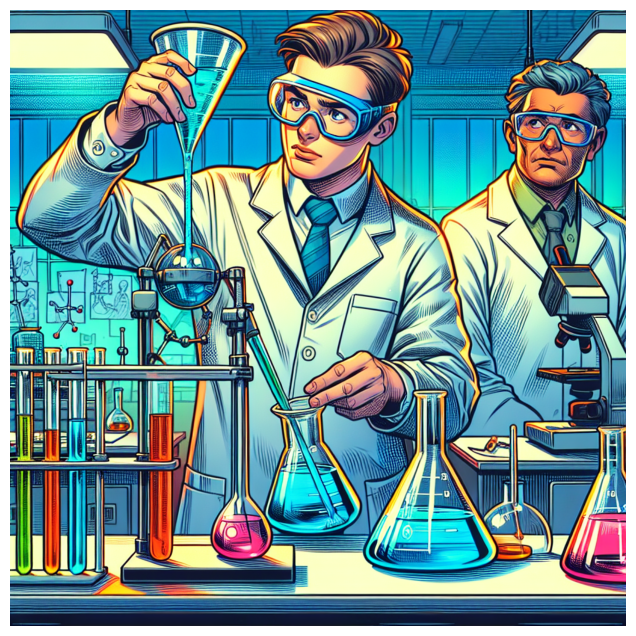


 Cartoon image saved as 'cartoon_result.jpg'


In [ ]:
# Example 7: Create cartoon art

# Select Image
IMAGE_URL = "https://biologicslab.co/BIO1173/images/class_04/class_04_4_image80.jpg"

# Ask GPT‑4o for a cartoon prompt
cartoon_prompt = generate_cartoon_prompt(IMAGE_URL)

if not cartoon_prompt:
    raise RuntimeError("Failed to generate a cartoon prompt.")

print("\n Cartoon Prompt:\n", cartoon_prompt)

# Generate the cartoon image
cartoon_img = generate_cartoon_image(cartoon_prompt)

if cartoon_img:
    # Save to the Colab filesystem
    cartoon_img.save("cartoon_result.jpg")
    print("\n Cartoon image saved as 'cartoon_result.jpg'")

    # Optional: let the user download the file
    #from google.colab import files
    #files.download("cartoon_result.jpg")
else:
    print("[⚠] DALL·E returned no image.")

If the code is correct you should see something like the following

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image61A.png)

### **Exercise 7: Generate Cartoon Image**

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image56A_smaller.png)

In the cell below write the code to turn this actual image of a clothing store scene into a cartoon‑style image using OpenAI’s GPT‑4o for prompt generation and DALL·E 3 for image synthesis.

Here is the URL for this image:

```text
"https://biologicslab.co/BIO1173/images/class_04/class_04_4_image56A.jpg"
```


In [ ]:
# Insert your code for Exercise 7 here



If the code is correct you should see something like the following

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image60A.png)

# **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Class_04_4.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

# **Lizard Tail**
## **NVIDIA**

### **Entrance of Endeavor headquarters building in 2018**

![__](https://upload.wikimedia.org/wikipedia/commons/7/75/2788-2888_San_Tomas_Expwy.jpg)

**Nvidia Corporation** (/ɛnˈvɪdiə/ en-VID-ee-ə) is an American multinational corporation and technology company headquartered in Santa Clara, California, and incorporated in Delaware. Founded in 1993 by Jensen Huang (president and CEO), Chris Malachowsky, and Curtis Priem, it is a software company which designs and supplies graphics processing units (GPUs), application programming interfaces (APIs) for data science and high-performance computing, and system on a chip units (SoCs) for mobile computing and the automotive market. Nvidia is also the dominant supplier of artificial intelligence (AI) hardware and software. Nvidia outsources the manufacturing of the hardware it designs.

Nvidia's professional line of GPUs are used for edge-to-cloud computing and in supercomputers and workstations for applications in fields such as architecture, engineering and construction, media and entertainment, automotive, scientific research, and manufacturing design. Its GeForce line of GPUs are aimed at the consumer market and are used in applications such as video editing, 3D rendering, and PC gaming. With a market share of 80.2% in the second quarter of 2023, Nvidia leads the market for discrete desktop GPUs by a wide margin. The company expanded its presence in the gaming industry with the introduction of the Shield Portable (a handheld game console), Shield Tablet (a gaming tablet), and Shield TV (a digital media player), as well as its cloud gaming service GeForce Now.

In addition to GPU design and outsourcing manufacturing, Nvidia provides the CUDA software platform and API that allows the creation of massively parallel programs which utilize GPUs. They are deployed in supercomputing sites around the world. In the late 2000s, Nvidia had moved into the mobile computing market, where it produces Tegra mobile processors for smartphones and tablets and vehicle navigation and entertainment systems. Its competitors include AMD, Intel,[19] Qualcomm, and AI accelerator companies such as Cerebras and Graphcore. It also makes AI-powered software for audio and video processing (e.g., Nvidia Maxine).

Nvidia's offer to acquire Arm from SoftBank in September 2020 failed to materialize following extended regulatory scrutiny, leading to the termination of the deal in February 2022 in what would have been the largest semiconductor acquisition. In 2023, Nvidia became the seventh public U.S. company to be valued at over \$1 trillion, and the company's valuation has increased rapidly since then as the company became a leader in data center chips with AI capabilities in the midst of the AI boom. In June 2024, for one day, Nvidia overtook Microsoft as the world's most valuable publicly traded company, with a market capitalization of over \$3.3 trillion.

## **History**

**Founding**

Nvidia was founded on April 5, 1993, by Jensen Huang (who, as of 2024, remains CEO), a Taiwanese-American electrical engineer who was previously the director of CoreWare at LSI Logic and a microprocessor designer at AMD; Chris Malachowsky, an engineer who worked at Sun Microsystems; and Curtis Priem, who was previously a senior staff engineer and graphics chip designer at IBM and Sun Microsystems. The three men agreed to start the company in a meeting at a Denny's roadside diner on Berryessa Road in East San Jose.

At the time, Malachowsky and Priem were frustrated with Sun's management and were looking to leave, but Huang was on "firmer ground", in that he was already running his own division at LSI. The three co-founders discussed a vision of the future which was so compelling that Huang decided to leave LSI and become the chief executive officer of their new startup.

In 1993, the three co-founders envisioned that the ideal trajectory for the forthcoming wave of computing would be in the realm of accelerated computing, specifically in graphics-based processing. This path was chosen due to its unique ability to tackle challenges that eluded general-purpose computing methods.[36] As Huang later explained: "We also observed that video games were simultaneously one of the most computationally challenging problems and would have incredibly high sales volume. Those two conditions don’t happen very often. Video games was our killer app — a flywheel to reach large markets funding huge R&D to solve massive computational problems." With \$40,000 in the bank, the company was born. The company subsequently received \$20 million of venture capital funding from Sequoia Capital, Sutter Hill Ventures and others.

During the late 1990s, Nvidia was one of 70 startup companies chasing the idea that graphics acceleration for video games was the path to the future. Only two survived: Nvidia and ATI Technologies, the latter of which merged into AMD.

Nvidia initially had no name and the co-founders named all their files NV, as in "next version". The need to incorporate the company prompted the co-founders to review all words with those two letters. At one point, Malachowsky and Priem wanted to call the company NVision, but that name was already taken by a manufacturer of toilet paper. Huang suggested the name Nvidia, from "invidia", the Latin word for "envy". The company's original headquarters office was in Sunnyvale, California.

**First graphics accelerator**

Nvidia's first graphics accelerator, the NV1, was designed to process quadrilateral primitives (forward texture mapping), a feature that set it apart from competitors, who preferred triangle primitives. However, when Microsoft introduced the DirectX platform, it chose not to support any other graphics software and announced that its Direct3D API would exclusively support triangles. As a result, the NV1 failed to gain traction in the market.

Nvidia had also entered into a partnership with Sega to supply the graphics chip for the Dreamcast console and worked on the project for about a year. However, Nvidia's technology was already lagging behind competitors. This placed the company in a difficult position: continue working on a chip that was likely doomed to fail or abandon the project, risking financial collapse.

In a pivotal moment, Sega's president, Shoichiro Irimajiri, visited Huang in person to inform him that Sega had decided to choose another vendor for the Dreamcast. However, Irimajiri believed in Nvidia's potential and persuaded Sega’s management to invest $5 million into the company. Huang later reflected that this funding was all that kept Nvidia afloat, and that Irimajiri's "understanding and generosity gave us six months to live".

In 1996, Huang laid off more than half of Nvidia's employees—thereby reducing headcount from 100 to 40—and focused the company's remaining resources on developing a graphics accelerator product optimized for processing triangle primitives: the RIVA 128. By the time the RIVA 128 was released in August 1997, Nvidia had only enough money left for one month’s payroll. The sense of impending failure became so pervasive that it gave rise to Nvidia's unofficial company motto: "Our company is thirty days from going out of business." Huang began internal presentations to Nvidia staff with those words for many years.

Nvidia sold about a million RIVA 128 units within four months, and used the revenue to fund development of its next generation of products. In 1998, the release of the RIVA TNT helped solidify Nvidia’s reputation as a leader in graphics technology.

**Public company**

Nvidia went public on January 22, 1999. Investing in Nvidia after it had already failed to deliver on its contract turned out to be Irimajiri's best decision as Sega's president. After Irimajiri left Sega in 2000, Sega sold its Nvidia stock for \$15 million.

In late 1999, Nvidia released the GeForce 256 (NV10), its first product expressly marketed as a GPU, which was most notable for introducing onboard transformation and lighting (T&L) to consumer-level 3D hardware. Running at 120 MHz and featuring four-pixel pipelines, it implemented advanced video acceleration, motion compensation, and hardware sub-picture alpha blending. The GeForce outperformed existing products by a wide margin.

Due to the success of its products, Nvidia won the contract to develop the graphics hardware for Microsoft's Xbox game console, which earned Nvidia a \$200 million advance. However, the project took many of its best engineers away from other projects. In the short term this did not matter, and the GeForce2 GTS shipped in the summer of 2000. In December 2000, Nvidia reached an agreement to acquire the intellectual assets of its one-time rival 3dfx, a pioneer in consumer 3D graphics technology leading the field from the mid-1990s until 2000. The acquisition process was finalized in April 2002.

In 2001, Standard & Poor's selected Nvidia to replace the departing Enron in the S&P 500 stock index, meaning that index funds would need to hold Nvidia shares going forward.

In July 2002, Nvidia acquired Exluna for an undisclosed sum. Exluna made software-rendering tools and the personnel were merged into the Cg project. In August 2003, Nvidia acquired MediaQ for approximately US$70 million. It launched GoForce the follow year. On April 22, 2004, Nvidia acquired iReady, also a provider of high-performance TCP offload engines and iSCSI controllers. In December 2004, it was announced that Nvidia would assist Sony with the design of the graphics processor (RSX) for the PlayStation 3 game console. On December 14, 2005, Nvidia acquired ULI Electronics, which at the time supplied third-party southbridge parts for chipsets to ATI, Nvidia's competitor. In March 2006, Nvidia acquired Hybrid Graphics. In December 2006, Nvidia, along with its main rival in the graphics industry AMD (which had acquired ATI), received subpoenas from the U.S. Department of Justice regarding possible antitrust violations in the graphics card industry.

# NVIDIA Corporation: A Pillar of AI and LLM Innovation

## 🏢 Company Overview

**Founded:** 1993  
**Headquarters:** Santa Clara, California  
**CEO:** Jensen Huang  
**Valuation (2025):** $4 Trillion  
**Employees:** ~36,000  
**Market Share:** 92% in discrete graphics segment

NVIDIA began as a graphics chip designer and revolutionized the gaming industry with the invention of the **GPU (Graphics Processing Unit)** in 1999. Over time, it evolved into a full-stack computing company, now leading the charge in AI, data centers, robotics, autonomous vehicles, and scientific computing.[1](https://www.thomasnet.com/insights/nvidia-company-overview/)

---

## 🚀 Role in AI and LLM Development

### 1. **Hardware Leadership**
- **GPUs for AI Training**: NVIDIA's H100 and Blackwell GB200 chips are optimized for training and inference of massive LLMs.
- **Blackwell Architecture**: Introduced in 2024, it supports ultra-efficient 4-bit precision inference, enabling real-time deployment of trillion-parameter models.[2](https://blogs.nvidia.com/blog/openai-gpt-oss/)
- **DGX Systems**: High-performance AI supercomputers used by enterprises and research institutions globally.

### 2. **Software Ecosystem**
- **CUDA Platform**: Over 450 million downloads; enables parallel computing on NVIDIA GPUs.
- **TensorRT-LLM**: Optimizes LLM inference for speed and efficiency.
- **NeMo Framework**: Supports training and customization of LLMs, including Megatron 530B.[3](https://nvidianews.nvidia.com/news/nvidia-launches-large-language-model-cloud-services-to-advance-ai-and-digital-biology)

### 3. **Cloud Services**
- **NeMo LLM Service**: Allows developers to fine-tune foundation models using prompt learning.
- **BioNeMo LLM Service**: Extends LLM capabilities to biology and chemistry, aiding in drug discovery and genomics.[3](https://nvidianews.nvidia.com/news/nvidia-launches-large-language-model-cloud-services-to-advance-ai-and-digital-biology)

### 4. **Strategic Collaborations**
- **OpenAI Partnership**: NVIDIA GPUs power OpenAI’s open-weight models like gpt-oss-120b, achieving 1.5 million tokens/sec on Blackwell systems.[2](https://blogs.nvidia.com/blog/openai-gpt-oss/)
- **Global Developer Ecosystem**: 6.5 million developers across 250 countries use NVIDIA’s AI stack.

---

## 🌍 Industry Impact

NVIDIA’s technologies are transforming multiple sectors:
- **Healthcare**: Accelerating diagnostics and drug discovery.
- **Automotive**: Enabling autonomous driving through the DRIVE platform.
- **Robotics**: Powering industrial and humanoid robots.
- **Climate Science**: Earth-2 digital twin predicts climate change impacts.
- **Metaverse**: Omniverse Cloud supports virtual world creation.
- **Quantum Research**: New center in Boston focuses on quantum computing applications.[1](https://www.thomasnet.com/insights/nvidia-company-overview/)

---

## 📈 Future Outlook

Despite challenges like chip shortages and competition, NVIDIA is projected to maintain dominance in AI and data center markets. Its continued investment in R&D, acquisitions, and infrastructure positions it as a cornerstone of the AI revolution.

> “I want to turn NVIDIA into one giant AI.”  
> — Jensen Huang, CEO[1](https://www.thomasnet.com/insights/nvidia-company-overview/)

---

## 🔗 References
- [NVIDIA Blog on OpenAI Collaboration](https://blogs.nvidia.com/blog/openai-gpt-oss/)[2](https://blogs.nvidia.com/blog/openai-gpt-oss/)  
- [Thomasnet Company Overview](https://www.thomasnet.com/insights/nvidia-company-overview/)[1](https://www.thomasnet.com/insights/nvidia-company-overview/)  
- [NVIDIA NeMo and BioNeMo Services](https://nvidianews.nvidia.com/news/nvidia-launches-large-language-model